## Základné príklady Pandas

Tento notebook vás prevedie niektorými veľmi základnými konceptmi Pandas. Začneme importovaním typických knižníc pre dátovú vedu:


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Séria

Séria je ako zoznam alebo 1D-pole, ale s indexom. Všetky operácie sú zarovnané podľa indexu.


In [37]:
a = pd.Series(range(1,10))
b = pd.Series(["I","like","to","use","Python","and","Pandas","very","much"],index=range(0,9))
print(a,b)

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
dtype: int64 0         I
1      like
2        to
3       use
4    Python
5       and
6    Pandas
7      very
8      much
dtype: object


Jedným z častých použití sérií je **časová séria**. V časovej sérii má index špeciálnu štruktúru - typicky rozsah dátumov alebo časových údajov. Takýto index môžeme vytvoriť pomocou `pd.date_range`.

Predpokladajme, že máme sériu, ktorá ukazuje množstvo produktu kúpeného každý deň, a vieme, že každú nedeľu si tiež musíme vziať jeden kus pre seba. Tu je spôsob, ako to modelovať pomocou sérií:


Length of index is 366


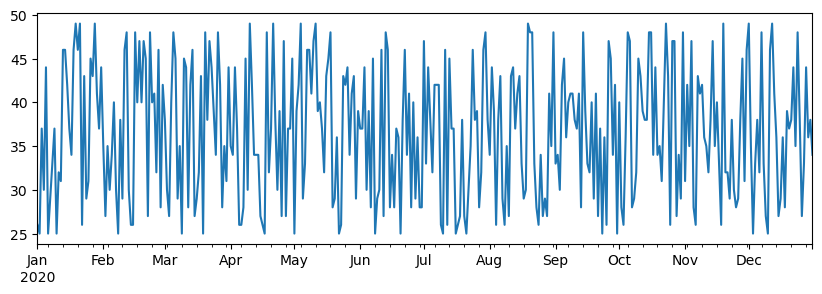

In [38]:
start_date = "Jan 1, 2020"
end_date = "Dec 31, 2020"
idx = pd.date_range(start_date,end_date)
print(f"Length of index is {len(idx)}")
items_sold = pd.Series(np.random.randint(25,50,size=len(idx)),index=idx)
items_sold.plot(figsize=(10,3))
plt.show()

In [39]:
additional_items = pd.Series(10,index=pd.date_range(start_date,end_date,freq="W"))
print(f"Additional items (10 item each week):\n{additional_items}")
total_items = items_sold+additional_items
print(f"Total items (sum of two series):\n{total_items}")

Additional items (10 item each week):
2020-01-05    10
2020-01-12    10
2020-01-19    10
2020-01-26    10
2020-02-02    10
2020-02-09    10
2020-02-16    10
2020-02-23    10
2020-03-01    10
2020-03-08    10
2020-03-15    10
2020-03-22    10
2020-03-29    10
2020-04-05    10
2020-04-12    10
2020-04-19    10
2020-04-26    10
2020-05-03    10
2020-05-10    10
2020-05-17    10
2020-05-24    10
2020-05-31    10
2020-06-07    10
2020-06-14    10
2020-06-21    10
2020-06-28    10
2020-07-05    10
2020-07-12    10
2020-07-19    10
2020-07-26    10
2020-08-02    10
2020-08-09    10
2020-08-16    10
2020-08-23    10
2020-08-30    10
2020-09-06    10
2020-09-13    10
2020-09-20    10
2020-09-27    10
2020-10-04    10
2020-10-11    10
2020-10-18    10
2020-10-25    10
2020-11-01    10
2020-11-08    10
2020-11-15    10
2020-11-22    10
2020-11-29    10
2020-12-06    10
2020-12-13    10
2020-12-20    10
2020-12-27    10
Freq: W-SUN, dtype: int64
Total items (sum of two series):
2020-01-01     NaN


Ako môžete vidieť, máme tu problémy, pretože v týždennej sérii sú dni, ktoré nie sú uvedené, považované za chýbajúce (`NaN`), a pridanie `NaN` k číslu nám dáva `NaN`. Aby sme získali správny výsledok, musíme pri sčítaní sérií špecifikovať `fill_value`:


2020-01-01    26.0
2020-01-02    25.0
2020-01-03    37.0
2020-01-04    30.0
2020-01-05    54.0
              ... 
2020-12-27    43.0
2020-12-28    44.0
2020-12-29    36.0
2020-12-30    38.0
2020-12-31    34.0
Length: 366, dtype: float64


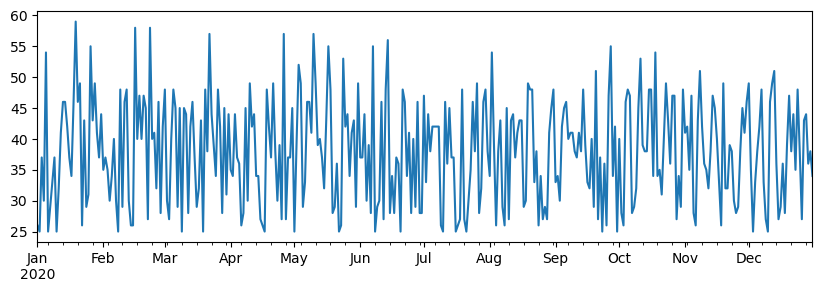

In [40]:
total_items = items_sold.add(additional_items,fill_value=0)
print(total_items)
total_items.plot(figsize=(10,3))
plt.show()

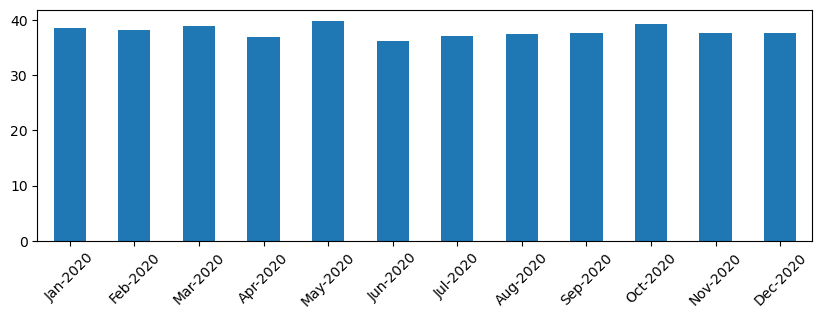

In [41]:
monthly = total_items.resample("1M").mean()
ax = monthly.plot(kind='bar',figsize=(10,3))
ax.set_xticklabels([x.strftime("%b-%Y") for x in monthly.index], rotation=45)
plt.show()

## DataFrame

DataFrame je v podstate zbierka sérií s rovnakým indexom. Môžeme skombinovať niekoľko sérií do jedného dataframe. Ak máme série `a` a `b` definované vyššie:


In [42]:
df = pd.DataFrame([a,b])
df

0     1   2    3       4    5       6     7     8
0  1     2   3    4       5    6       7     8     9
1  I  like  to  use  Python  and  Pandas  very  much

Môžeme tiež použiť Series ako stĺpce a zadať názvy stĺpcov pomocou slovníka:


In [43]:
df = pd.DataFrame({ 'A' : a, 'B' : b })
df

A       B
0  1       I
1  2    like
2  3      to
3  4     use
4  5  Python
5  6     and
6  7  Pandas
7  8    very
8  9    much

Rovnaký výsledok možno dosiahnuť transponovaním (a následným premenovaním stĺpcov, aby zodpovedali predchádzajúcemu príkladu):


In [44]:
pd.DataFrame([a,b]).T.rename(columns={ 0 : 'A', 1 : 'B' })

A       B
0  1       I
1  2    like
2  3      to
3  4     use
4  5  Python
5  6     and
6  7  Pandas
7  8    very
8  9    much

**Výber stĺpcov** z DataFrame sa dá vykonať takto:


In [45]:
print(f"Column A (series):\n{df['A']}")
print(f"Columns B and A (DataFrame):\n{df[['B','A']]}")

Column A (series):
0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
Name: A, dtype: int64
Columns B and A (DataFrame):
        B  A
0       I  1
1    like  2
2      to  3
3     use  4
4  Python  5
5     and  6
6  Pandas  7
7    very  8
8    much  9


**Výber riadkov** na základe filtračného výrazu:


In [46]:
df[df['A']<5]

A     B
0  1     I
1  2  like
2  3    to
3  4   use

Spôsob, akým to funguje, je, že výraz `df['A']<5` vráti booleovskú sériu, ktorá označuje, či je výraz `True` alebo `False` pre každý prvok série. Keď sa séria použije ako index, vráti podmnožinu riadkov v DataFrame. Preto nie je možné použiť ľubovoľný booleovský výraz v Pythone, napríklad napísať `df[df['A']>5 and df['A']<7]` by bolo nesprávne. Namiesto toho by ste mali použiť špeciálnu operáciu `&` na booleovskej sérii:


In [47]:
df[(df['A']>5) & (df['A']<7)]

A    B
5  6  and

**Vytváranie nových vypočítateľných stĺpcov**. Nové vypočítateľné stĺpce pre náš DataFrame môžeme jednoducho vytvoriť pomocou intuitívnych výrazov. Kód nižšie vypočíta odchýlku A od jeho priemernej hodnoty.


In [48]:
df['DivA'] = df['A']-df['A'].mean()
df

A       B  DivA
0  1       I  -4.0
1  2    like  -3.0
2  3      to  -2.0
3  4     use  -1.0
4  5  Python   0.0
5  6     and   1.0
6  7  Pandas   2.0
7  8    very   3.0
8  9    much   4.0

Čo sa v skutočnosti deje, je, že počítame sériu a potom túto sériu priraďujeme na ľavú stranu, čím vytvárame ďalší stĺpec.


In [49]:
# WRONG: df['ADescr'] = "Low" if df['A'] < 5 else "Hi"
df['LenB'] = len(df['B']) # Wrong result

In [50]:
df['LenB'] = df['B'].apply(lambda x: len(x))
# or
df['LenB'] = df['B'].apply(len)
df

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6
5  6     and   1.0     3
6  7  Pandas   2.0     6
7  8    very   3.0     4
8  9    much   4.0     4

**Výber riadkov na základe čísel** možno vykonať pomocou konštruktu `iloc`. Napríklad, na výber prvých 5 riadkov z DataFrame:


In [52]:
df.iloc[:5]

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6

**Zoskupovanie** sa často používa na dosiahnutie výsledku podobného *kontingenčným tabuľkám* v Exceli. Predpokladajme, že chceme vypočítať priemernú hodnotu stĺpca `A` pre každé dané číslo `LenB`. Potom môžeme zoskupiť náš DataFrame podľa `LenB` a zavolať `mean`:


In [53]:
df.groupby(by='LenB').mean()

A      DivA
LenB                    
1     1.000000 -4.000000
2     3.000000 -2.000000
3     5.000000  0.000000
4     6.333333  1.333333
6     6.000000  1.000000

Ak potrebujeme vypočítať priemer a počet prvkov v skupine, môžeme použiť zložitejšiu funkciu `aggregate`:


In [58]:
df.groupby(by='LenB') \
 .aggregate({ 'DivA' : len, 'A' : lambda x: x.mean() }) \
 .rename(columns={ 'DivA' : 'Count', 'A' : 'Mean'})

Count      Mean
LenB                 
1         1  1.000000
2         1  3.000000
3         2  5.000000
4         3  6.333333
6         2  6.000000

## Tlač a Vizualizácia

Dátoví vedci často potrebujú preskúmať dáta, a preto je dôležité vedieť ich vizualizovať. Keď je DataFrame veľký, často chceme len overiť, či robíme všetko správne, tým, že si vytlačíme prvých pár riadkov. Toto je možné dosiahnuť zavolaním `df.head()`. Ak to spúšťate z Jupyter Notebooku, DataFrame sa zobrazí v peknej tabuľkovej forme.


In [59]:
df.head()

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6

Videli sme aj použitie funkcie `plot` na vizualizáciu niektorých stĺpcov. Aj keď je `plot` veľmi užitočný pre mnohé úlohy a podporuje rôzne typy grafov prostredníctvom parametra `kind=`, vždy môžete použiť základnú knižnicu `matplotlib` na vykreslenie niečoho zložitejšieho. Vizualizáciu dát si podrobne preberieme v samostatných lekciách kurzu.


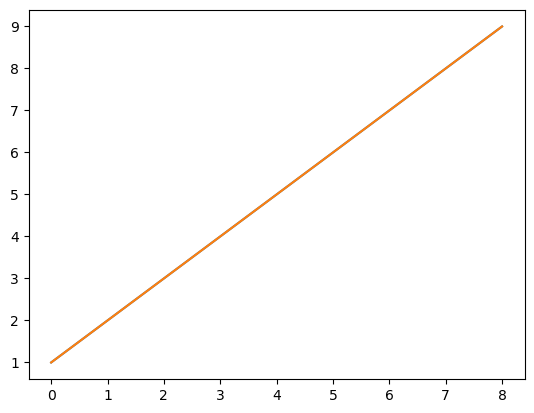

In [61]:
df['A'].plot()
plt.show()

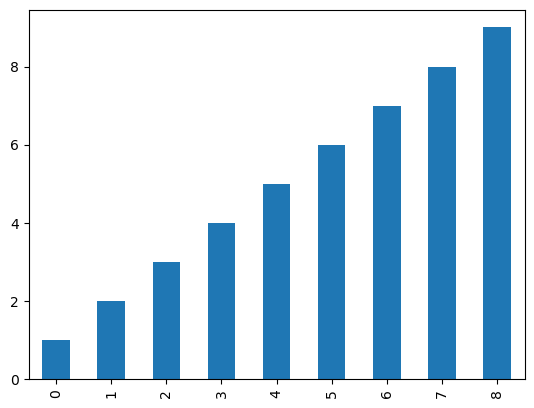

In [63]:
df['A'].plot(kind='bar')
plt.show()

Tento prehľad pokrýva najdôležitejšie koncepty knižnice Pandas, avšak táto knižnica je mimoriadne bohatá a možnosti jej využitia sú prakticky neobmedzené! Poďme teraz aplikovať tieto vedomosti na riešenie konkrétneho problému.



---

**Upozornenie**:  
Tento dokument bol preložený pomocou služby na automatický preklad [Co-op Translator](https://github.com/Azure/co-op-translator). Aj keď sa snažíme o presnosť, upozorňujeme, že automatické preklady môžu obsahovať chyby alebo nepresnosti. Pôvodný dokument v jeho pôvodnom jazyku by mal byť považovaný za autoritatívny zdroj. Pre kritické informácie sa odporúča profesionálny ľudský preklad. Nezodpovedáme za akékoľvek nedorozumenia alebo nesprávne interpretácie vyplývajúce z použitia tohto prekladu.
